In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix

In [16]:
dir = '/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/'
#dir = '/home/brainstimmaps/RESEARCH/20xx_Projects/2021_HDP/perm_test/'

In [17]:
newdata = 'newdata10/'
best_level_clinical_model_HDP = pd.read_csv(dir + newdata + 'best_level_clinical_model_HDP.csv')
best_level_clinical_model_CST = pd.read_csv(dir + newdata + 'best_level_clinical_model_CST.csv')
best_level_clinical_model_2 = pd.read_csv(dir + newdata + 'best_level_clinical_model_2.csv')
best_level_clinical_model_win = pd.read_csv(dir + newdata + 'best_level_clinical_model_window.csv')

best_contact_clinical_model_HDP = pd.read_csv(dir + newdata + 'best_contact_clinical_model_HDP.csv')
best_contact_clinical_model_CST = pd.read_csv(dir + newdata + 'best_contact_clinical_model_CST.csv')
best_contact_clinical_model_2 = pd.read_csv(dir + newdata + 'best_contact_clinical_model_2.csv')
best_contact_clinical_model_win = pd.read_csv(dir + newdata + 'best_contact_clinical_model_window.csv')

In [18]:
from sklearn.metrics import balanced_accuracy_score

def custom_perm(x, y, k, name, n_perm=100000, dir=dir):

    n_permutations = n_perm
    permute_stat = []

    for p in range(n_permutations):
        x_permuted = np.random.permutation(x)
        stat = balanced_accuracy_score(y,x_permuted)
        permute_stat.append(stat)

    model_stat = balanced_accuracy_score(y,x)
    p_value = 1 - np.sum(permute_stat < model_stat)/len(permute_stat) # upper tailed test
    #p_value = np.sum(permute_mse < model_mse)/len(permute_mse) # lower tailed test

    plt.rcParams["figure.figsize"] = (3,2)
    sns.histplot(permute_stat, kde=True, label='Population')
    plt.title(name, fontsize=14)
    plt.ylabel('Frequency')

    plt.axvline(x=model_stat, ymin=0, ymax=1, color='red', linestyle='--')

    plt.savefig(dir + newdata + 'plot_permtests/' +  name + '.png', dpi=300, bbox_inches='tight')

    print(f'Model stat: {model_stat}')
    print(f'n permutations < Model stat = {np.sum(permute_stat < model_stat)}')
    print(f'p-value = {p_value:.3}')

    # Obtain confusion matrix, true postive rate (TPR) and true negative rate (TPN)
    tn, fp, fn, tp = confusion_matrix(y, x).ravel()
    print(f'(tn, fp, fn, tp): {tn, fp, fn, tp}')
    print(f'TPR: {tp/(tp+fn)}')
    print(f'TNR: {tn/(tn+fp)}')
    print(f'Balanced acc.: {((tp/(tp+fn))+(tn/(tn+fp)))/2}')

Model stat: 0.6308528428093645
n permutations < Model stat = 99793
p-value = 0.00207
(tn, fp, fn, tp): (63, 29, 22, 30)
TPR: 0.5769230769230769
TNR: 0.6847826086956522
Balanced acc.: 0.6308528428093645


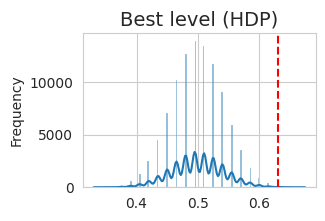

In [19]:
# Best level HDP
x = best_level_clinical_model_HDP.best_model.to_numpy()
y = best_level_clinical_model_HDP.best_clin.to_numpy()
k = best_level_clinical_model_HDP.LeadID.nunique()

custom_perm(x, y, k, 'Best level (HDP)')

In [20]:
df = best_level_clinical_model_HDP

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p, alternative='greater')

/tmp/ipykernel_131181/2319116268.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p, alternative='greater')


0.001233676828820951

Model stat: 0.49628359062321326
n permutations < Model stat = 39530
p-value = 0.605
(tn, fp, fn, tp): (100, 59, 28, 16)
TPR: 0.36363636363636365
TNR: 0.6289308176100629
Balanced acc.: 0.49628359062321326


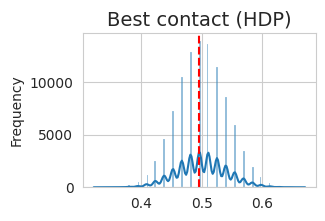

In [21]:
# Best contact HDP
x = best_contact_clinical_model_HDP.best_model.to_numpy()
y = best_contact_clinical_model_HDP.best_clin.to_numpy()
k = best_contact_clinical_model_HDP.LeadID.nunique()

custom_perm(x, y, k, 'Best contact (HDP)')

In [22]:
df = best_contact_clinical_model_HDP

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p, alternative='greater')

/tmp/ipykernel_131181/1247464318.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p, alternative='greater')


0.018534686030280714

Model stat: 0.6224916387959867
n permutations < Model stat = 99673
p-value = 0.00327
(tn, fp, fn, tp): (65, 27, 24, 28)
TPR: 0.5384615384615384
TNR: 0.7065217391304348
Balanced acc.: 0.6224916387959867


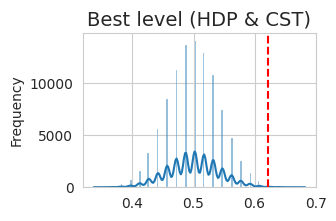

In [23]:
# Best level 2
x = best_level_clinical_model_2.best_model.to_numpy()
y = best_level_clinical_model_2.best_clin.to_numpy()
k = best_level_clinical_model_2.LeadID.nunique()

custom_perm(x, y, k, 'Best level (HDP & CST)')

In [24]:
df = best_level_clinical_model_2

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p, alternative='greater')

/tmp/ipykernel_131181/766352454.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p, alternative='greater')


0.006736817909990582

Model stat: 0.47670097198399086
n permutations < Model stat = 22834
p-value = 0.772
(tn, fp, fn, tp): (101, 58, 30, 14)
TPR: 0.3181818181818182
TNR: 0.6352201257861635
Balanced acc.: 0.47670097198399086


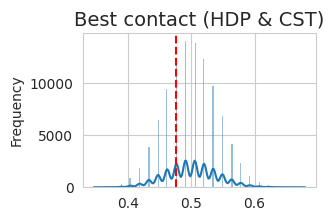

In [25]:
# Best contact 2
x = best_contact_clinical_model_2.best_model.to_numpy()
y = best_contact_clinical_model_2.best_clin.to_numpy()
k = best_contact_clinical_model_2.LeadID.nunique()

custom_perm(x, y, k, 'Best contact (HDP & CST)')

In [26]:
df = best_contact_clinical_model_2

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p, alternative='greater')

/tmp/ipykernel_131181/682907636.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p, alternative='greater')


0.07772576839439205

In [27]:
df.loc[(df.best_clin == 1) & (df.best_model == 1)]
len(df.loc[df.best_clin == 1])

44

Model stat: 0.6785714285714286
n permutations < Model stat = 99997
p-value = 3e-05
(tn, fp, fn, tp): (75, 37, 15, 33)
TPR: 0.6875
TNR: 0.6696428571428571
Balanced acc.: 0.6785714285714286


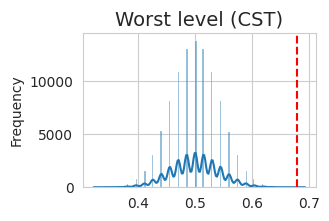

In [28]:
# Best level CST
x = best_level_clinical_model_CST.best_model.to_numpy()
y = best_level_clinical_model_CST.best_clin.to_numpy()
k = best_level_clinical_model_CST.LeadID.nunique()

custom_perm(x, y, k, 'Worst level (CST)')

In [29]:
df = best_level_clinical_model_CST

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p=p, alternative='greater')

/tmp/ipykernel_131181/2115262554.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p=p, alternative='greater')


3.5411630596002386e-08

Model stat: 0.6512539184952978
n permutations < Model stat = 99995
p-value = 5e-05
(tn, fp, fn, tp): (105, 49, 22, 36)
TPR: 0.6206896551724138
TNR: 0.6818181818181818
Balanced acc.: 0.6512539184952978


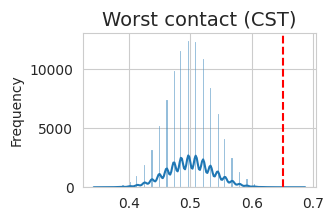

In [30]:
# Best contact CST
x = best_contact_clinical_model_CST.best_model.to_numpy()
y = best_contact_clinical_model_CST.best_clin.to_numpy()
k = best_contact_clinical_model_CST.LeadID.nunique()

custom_perm(x, y, k, 'Worst contact (CST)')

In [31]:
df = best_contact_clinical_model_CST

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p=p, alternative='greater')

/tmp/ipykernel_131181/2828415216.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p=p, alternative='greater')


3.4590998817274034e-08

Model stat: 0.6395927066066778
n permutations < Model stat = 99871
p-value = 0.00129
(tn, fp, fn, tp): (79, 24, 20, 21)
TPR: 0.5121951219512195
TNR: 0.7669902912621359
Balanced acc.: 0.6395927066066778


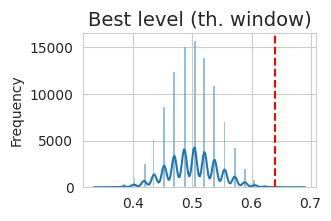

In [32]:
# Best level window
x = best_level_clinical_model_win.best_model.to_numpy()
y = best_level_clinical_model_win.best_clin.to_numpy()
k = best_level_clinical_model_win.LeadID.nunique()

custom_perm(x, y, k, 'Best level (th. window)')

In [33]:
df = best_level_clinical_model_win

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p=p, alternative='greater')

/tmp/ipykernel_131181/4242483203.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p=p, alternative='greater')


0.001764873474387489

Model stat: 0.5144696759900305
n permutations < Model stat = 59371
p-value = 0.406
(tn, fp, fn, tp): (124, 33, 35, 11)
TPR: 0.2391304347826087
TNR: 0.7898089171974523
Balanced acc.: 0.5144696759900305


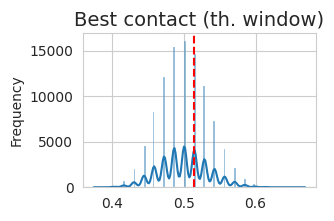

In [34]:
# Best contact window
x = best_contact_clinical_model_win.best_model.to_numpy()
y = best_contact_clinical_model_win.best_clin.to_numpy()
k = best_contact_clinical_model_win.LeadID.nunique()

custom_perm(x, y, k, 'Best contact (th. window)')

In [35]:
df = best_contact_clinical_model_win

x = len(df.loc[(df.best_clin == 1) & (df.best_model == 1)])
n = len(df.loc[df.best_clin == 1])
p = n / len(df)

stats.binom_test(x, n, p=p, alternative='greater')

/tmp/ipykernel_131181/2254229793.py:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x, n, p=p, alternative='greater')


0.4763444770675913

In [36]:
df.loc[(df.best_clin == 1) & (df.best_model == 1)]
df.loc[(df.best_clin == df.best_model )]
df.loc[(df.best_clin == 1)]

LeadID ContactID  contact  best_clin  best_model  compare  contact_clin  \
4    BaHe_L    BaHe_8        8          1           0    False             8   
8    BoPa_R   BoPa_16       16          1           0    False            16   
16   ByDe_L    ByDe_8        8          1           0    False             8   
24   ByDe_R   ByDe_16       16          1           0    False            16   
32   DaHa_L    DaHa_8        8          1           0    False             8   
39   DaHa_R   DaHa_15       15          1           0    False            15   
42   FlEs_L    FlEs_8        8          1           1     True             8   
46   FlEs_R   FlEs_15       15          1           0    False            15   
47   FlEs_R   FlEs_16       16          1           1     True            16   
54   FoEl_L    FoEl_7        7          1           0    False             7   
63   FoEl_R   FoEl_16       16          1           0    False            16   
71   GrRu_L    GrRu_8        8          1           0    False             8   
79   GrRu_R   GrRu_16       16          1           0    False            16   
81   GuNa_L    GuNa_8        8          1           1     True             8   
83   GuNa_R   GuNa_16       16          1           0    False            16   
85   HeHa_L    HeHa_2        2          1           0    False             2   
97   IsNa_L    IsNa_7        7          1           0    False             7   
104  IsNa_R   IsNa_14       14          1           0    False            14   
106  IsNa_R   IsNa_16       16          1           0    False            16   
112  JaQe_L    JaQe_6        6          1           0    False             6   
114  JaQe_L    JaQe_8        8          1           0    False             8   
122  JaQe_R   JaQe_16       16          1           0    False            16   
128  KnEv_L    KnEv_7        7          1           0    False             7   
133  KaCl_L    KaCl_8        8          1           1     True             8   
134  MaMa_L    MaMa_1        1          1           0    False             1   
144  PoMi_L    PoMi_8        8          1           1     True             8   
146  PoMi_R   PoMi_16       16          1           1     True            16   
148  RoSo_L    RoSo_8        8          1           1     True             8   
150  RoSo_R   RoSo_16       16          1           1     True            16   
157  TaGi_L    TaGi_7        7          1           1     True             7   
163  TaGi_R   TaGi_13       13          1           0    False            13   
168  ToDo_L    ToDo_8        8          1           1     True             8   
172  ToDo_R   ToDo_12       12          1           0    False            12   
173  ToDo_R   ToDo_13       13          1           0    False            13   
174  ToDo_R   ToDo_14       14          1           0    False            14   
175  ToDo_R   ToDo_15       15          1           1     True            15   
178  ToDr_L    ToDr_2        2          1           0    False             2   
179  ToDr_L    ToDr_3        3          1           0    False             3   
180  ToDr_L    ToDr_4        4          1           0    False             4   
181  ToDr_L    ToDr_5        5          1           0    False             5   
183  ToDr_L    ToDr_7        7          1           0    False             7   
184  ToDr_L    ToDr_8        8          1           0    False             8   
186  ToDr_R   ToDr_13       13          1           0    False            13   
192  WiDa_L    WiDa_6        6          1           0    False             6   
194  WiDa_L    WiDa_8        8          1           0    False             8   
198  WiDa_R   WiDa_12       12          1           0    False            12   

     contact_model  
4                0  
8                0  
16               0  
24               0  
32               0  
39               0  
42               8  
46               0  
47              16  
54               0  
63           

In [37]:
best_level_clinical_model_2.LeadID.nunique()

36